# This is a the All-Sky Test Simulation for OBAF Convective Core Stars

# Star Selection Rules

There are 4 classes of stars in the convective core target list. The cadences are tuned such that S/N ~ 60 per visit spectrum is reached (which is essential for accurate RV determination and is achieved when back-to-back exposures are co-added) and S/N ~100 or higher is obtained for the final spectrum (essential for atmospheric parameters determination and is achieved when individual visit spectra are co-added)

- **TESS CVZ OBAF Targets**
    - mwm_tess_obaf_20x1 - 20 visits with 1 exposure for OBAF binaries in both TESS CVZs for stars with 7 <= Hmag < 9.5. One spectrum per visit is enough to reach S/N~60 and when all 20 visit spectra are used for disentangling, the resulting disentangled spectra will have S/N sufficiently high for atmospheric parameters and chemical composition determination
    - mwm_tess_obaf_20x3 - same as 1) but with three exposures per visit to be taken back-to-back for stars with 9.5 <= Hmag <= 11.

- **TESS All-Sky OB Targets**
    - mwm_tess_ob_3x1 - 3 visits with 1 exposure for all TESS OB stars with 7 <= Hmag < 9.5. One spectrum per visit is enough to reach S/N~60, 3 visits are needed to check for binarity and when co-added for single stars, high enough S/N is achieved for atmospheric parameters and chemical composition determination.
    - mwm_tess_ob_3x3 - same as 3) but with three exposures per visit to be taken back-to-back for stars with 9.5 <= Hmag <= 11.


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
import astropy.units as u
from targetlib import testfield_gal,testfield_fk5,testfield_ecl,h2exp
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
%matplotlib inline

In [2]:
#Define some helper functions
def safe_less(array, value):
    '''
    Return a mask for indices that are less than value. Is NaN safe.
    
    Arguments:
        array: numerical numpy array with NaNs
        value: value below, which function returns true
    Returns:
        boolean array with True for indices less than value and False for all other
        values including NaNs
    '''   
    mask = np.zeros(array.shape, dtype=bool)
    np.less(array, value, out=mask, where=~np.isnan(array)) #Used to avoid warning with nan values
    return(mask)

In [3]:
obaf1_target_tab = Table.read('workspace/target_files/OBAF/mwm_tess_obaf_20x1.csv'
                         ,format='ascii')
obaf3_target_tab = Table.read('workspace/target_files/OBAF/mwm_tess_obaf_20x3.csv'
                         ,format='ascii')
ob1_target_tab = Table.read('workspace/target_files/OBAF/mwm_tess_ob_3x1.csv'
                         ,format='ascii')
ob3_target_tab = Table.read('workspace/target_files/OBAF/mwm_tess_ob_3x3.csv'
                         ,format='ascii')
ob3_target_tab

RA,Dec,Hmag
float64,float64,float64
307.404708,39.032194,10.309
308.112542,38.857111,9.717
334.749495,56.121902,9.678
334.973392,56.160894,10.392
335.822572,55.633959,9.65
342.336073,57.758758,10.044
341.832053,58.161904,9.564
341.954779,58.076908,10.962
1.990416,63.67872,9.901


## Plot stars

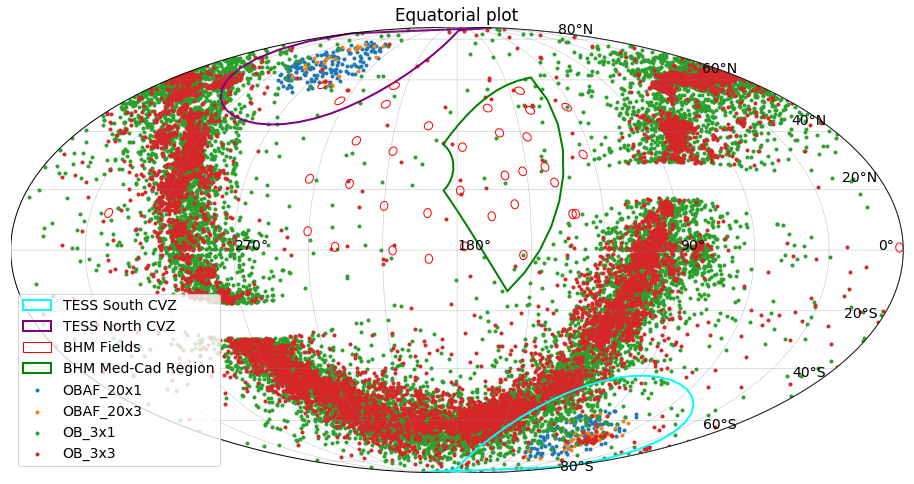

In [4]:
plt.rcParams.update({'font.size': 14})

(fig,bmap) = testfield_fk5()
#Plot OBAF Targets
xplan,yplan = bmap(obaf1_target_tab['RA'],obaf1_target_tab['Dec'])
bmap.scatter(xplan,yplan,marker='.',label='OBAF_20x1',alpha=1)
xplan,yplan = bmap(obaf3_target_tab['RA'],obaf3_target_tab['Dec'])
bmap.scatter(xplan,yplan,marker='.',label='OBAF_20x3',alpha=1)
xplan,yplan = bmap(ob1_target_tab['RA'],ob1_target_tab['Dec'])
bmap.scatter(xplan,yplan,marker='.',label='OB_3x1',alpha=1)
xplan,yplan = bmap(ob3_target_tab['RA'],ob3_target_tab['Dec'])
bmap.scatter(xplan,yplan,marker='.',label='OB_3x3',alpha=1)
plt.title("Equatorial plot")
plt.legend()
plt.show()

## Create Target Table

In [5]:
target_tab = Table()

In [6]:
cadence_list = ["mwm_tess_obaf_20x1" for x in obaf1_target_tab] + ["mwm_tess_obaf_20x3" for x in obaf3_target_tab] + (
    ["mwm_tess_ob_3x1" for x in ob1_target_tab]) + ["mwm_tess_ob_3x3" for x in ob3_target_tab]
print(cadence_list[-20:-1])

['mwm_tess_ob_3x3', 'mwm_tess_ob_3x3', 'mwm_tess_ob_3x3', 'mwm_tess_ob_3x3', 'mwm_tess_ob_3x3', 'mwm_tess_ob_3x3', 'mwm_tess_ob_3x3', 'mwm_tess_ob_3x3', 'mwm_tess_ob_3x3', 'mwm_tess_ob_3x3', 'mwm_tess_ob_3x3', 'mwm_tess_ob_3x3', 'mwm_tess_ob_3x3', 'mwm_tess_ob_3x3', 'mwm_tess_ob_3x3', 'mwm_tess_ob_3x3', 'mwm_tess_ob_3x3', 'mwm_tess_ob_3x3', 'mwm_tess_ob_3x3']


In [7]:
type_list = ["TESS_OBAF" for x in obaf1_target_tab] + ["TESS_OBAF" for x in obaf3_target_tab] + (
    ["TESS_OB" for x in ob1_target_tab]) + ["TESS_OB" for x in ob3_target_tab]
print(type_list[-20:-1])

['TESS_OB', 'TESS_OB', 'TESS_OB', 'TESS_OB', 'TESS_OB', 'TESS_OB', 'TESS_OB', 'TESS_OB', 'TESS_OB', 'TESS_OB', 'TESS_OB', 'TESS_OB', 'TESS_OB', 'TESS_OB', 'TESS_OB', 'TESS_OB', 'TESS_OB', 'TESS_OB', 'TESS_OB']


In [8]:
target_tab['ra'] = np.concatenate([obaf1_target_tab['RA'],obaf3_target_tab['RA'],ob1_target_tab['RA'],
                                   ob3_target_tab['RA']])
target_tab['dec'] = np.concatenate([obaf1_target_tab['Dec'],obaf3_target_tab['Dec'],ob1_target_tab['Dec'],
                                   ob3_target_tab['Dec']])
target_tab['cadence'] = cadence_list
target_tab['type'] = type_list
target_tab['priority'] = np.repeat(np.array(25,dtype='int32'),len(type_list))
target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),len(type_list))

In [9]:
target_tab

ra,dec,cadence,type,priority,value
float64,float64,str18,str9,int32,float32
294.4010162,64.0167114,mwm_tess_obaf_20x1,TESS_OBAF,25,1.0
249.30212,76.1636397,mwm_tess_obaf_20x1,TESS_OBAF,25,1.0
300.0165912,68.4367586,mwm_tess_obaf_20x1,TESS_OBAF,25,1.0
258.0953058,57.2234322,mwm_tess_obaf_20x1,TESS_OBAF,25,1.0
283.4362367,60.01787008,mwm_tess_obaf_20x1,TESS_OBAF,25,1.0
267.6306229,57.4435203,mwm_tess_obaf_20x1,TESS_OBAF,25,1.0
289.10086465,67.1351659,mwm_tess_obaf_20x1,TESS_OBAF,25,1.0
255.89179733,57.49978351,mwm_tess_obaf_20x1,TESS_OBAF,25,1.0
289.54859794,60.96003109,mwm_tess_obaf_20x1,TESS_OBAF,25,1.0


In [10]:
target_tab.write('mwm_tess_obaf_target.fits',overwrite=True)

## Create Cadence Table

## Cadence rules
For the first two cases (binaries in CVZs), we are interested in uniform coverage of orbital phases, hence sampling will depend a lot on distribution of orbital periods and eccentricities. We will come up with a (pseudo-)optimal observing strategy when TESS completes its CVZs. Optimal sampling for  the cases 3) and 4) would be that the first two visits are separated by 1-2 months with the third visit happening 8-9 months after the second one. This allows to cover a broad range of (unknown!) binary periods and hence to efficiently separate single stars from binaries.

We will use the 20 epoch pattern from the selected area test.
For max deltas we will use 15 days larger than the delta

In [11]:
cadence_tab = Table()

In [12]:
cadence_tab['cadence'] = ["mwm_tess_obaf_20x1","mwm_tess_obaf_20x3","mwm_tess_ob_3x1","mwm_tess_ob_3x3"]
cadence_tab['nepochs'] = [20,60,3,9]
cadence_tab

cadence,nepochs
str18,int64
mwm_tess_obaf_20x1,20
mwm_tess_obaf_20x3,60
mwm_tess_ob_3x1,3
mwm_tess_ob_3x3,9


In [13]:
#Make all the deltas size 60
obaf1_delta = [0,21,42,63,84,105,126,147,168,189,210,231,252,273,294,315,336,357,378,399]
obaf1_delta_arr = np.concatenate([np.array(obaf1_delta,dtype=np.float64),np.repeat(np.nan,40)])
obaf3_delta_arr = np.array([0,0,0,21,0,0,42,0,0,63,0,0,84,0,0,105,0,0,126,0,0,147,0,
             0,168,0,0,189,0,0,210,0,0,231,0,0,252,0,0,273,0,0,294,0,0,315,
                            0,0,336,0,0,357,0,0,378,0,0,399,0,0],dtype=np.float64)
ob1_delta = [0,45,240]
ob1_delta_arr = np.concatenate([np.array(ob1_delta,dtype=np.float64),np.repeat(np.nan,57)])
ob3_delta = [0,0,0,45,0,0,240,0,0]
ob3_delta_arr = np.concatenate([np.array(ob3_delta,dtype=np.float64),np.repeat(np.nan,51)])

delta_arr = np.array([obaf1_delta_arr,obaf3_delta_arr,ob1_delta_arr,ob3_delta_arr],dtype='float32')
print(delta_arr)
cadence_tab['delta'] = delta_arr
cadence_tab

[[  0.  21.  42.  63.  84. 105. 126. 147. 168. 189. 210. 231. 252. 273.
  294. 315. 336. 357. 378. 399.  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan]
 [  0.   0.   0.  21.   0.   0.  42.   0.   0.  63.   0.   0.  84.   0.
    0. 105.   0.   0. 126.   0.   0. 147.   0.   0. 168.   0.   0. 189.
    0.   0. 210.   0.   0. 231.   0.   0. 252.   0.   0. 273.   0.   0.
  294.   0.   0. 315.   0.   0. 336.   0.   0. 357.   0.   0. 378.   0.
    0. 399.   0.   0.]
 [  0.  45. 240.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan]
 [  0.   0.   0.  45.   0.   0. 240.   0.   0.  nan  nan  nan  nan 

cadence,nepochs,delta [60]
str18,int64,float32
mwm_tess_obaf_20x1,20,0.0 .. nan
mwm_tess_obaf_20x3,60,0.0 .. 0.0
mwm_tess_ob_3x1,3,0.0 .. nan
mwm_tess_ob_3x3,9,0.0 .. nan


In [14]:
#Make all the delta_mins -7 days from delta except for zeros 
obaf1_min_arr = obaf1_delta_arr - 7
mask = safe_less(obaf1_min_arr,0)
obaf1_min_arr[mask] = 0

obaf3_min_arr = obaf3_delta_arr - 7
mask = safe_less(obaf3_min_arr,0)
obaf3_min_arr[mask] = 0

ob1_min_arr = ob1_delta_arr - 7
mask = safe_less(ob1_min_arr,0)
ob1_min_arr[mask] = 0

ob3_min_arr = ob3_delta_arr - 7
mask = safe_less(ob3_min_arr,0)
ob3_min_arr[mask] = 0

delta_min_arr = np.array([obaf1_min_arr,obaf3_min_arr,ob1_min_arr,ob3_min_arr],dtype='float32')
print(delta_min_arr)
cadence_tab['delta_min'] = delta_min_arr
cadence_tab

[[  0.  14.  35.  56.  77.  98. 119. 140. 161. 182. 203. 224. 245. 266.
  287. 308. 329. 350. 371. 392.  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan]
 [  0.   0.   0.  14.   0.   0.  35.   0.   0.  56.   0.   0.  77.   0.
    0.  98.   0.   0. 119.   0.   0. 140.   0.   0. 161.   0.   0. 182.
    0.   0. 203.   0.   0. 224.   0.   0. 245.   0.   0. 266.   0.   0.
  287.   0.   0. 308.   0.   0. 329.   0.   0. 350.   0.   0. 371.   0.
    0. 392.   0.   0.]
 [  0.  38. 233.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan]
 [  0.   0.   0.  38.   0.   0. 233.   0.   0.  nan  nan  nan  nan 

cadence,nepochs,delta [60],delta_min [60]
str18,int64,float32,float32
mwm_tess_obaf_20x1,20,0.0 .. nan,0.0 .. nan
mwm_tess_obaf_20x3,60,0.0 .. 0.0,0.0 .. 0.0
mwm_tess_ob_3x1,3,0.0 .. nan,0.0 .. nan
mwm_tess_ob_3x3,9,0.0 .. nan,0.0 .. nan


In [15]:
#Make all the delta_max +15 days from delta except for zeros, make them 0.04 to deal with passing clouds. 
obaf1_max_arr = obaf1_delta_arr + 15
mask = safe_less(obaf1_delta_arr,.1)
obaf1_max_arr[mask] = 0.04
obaf1_max_arr[0] = 0

obaf3_max_arr = obaf3_delta_arr + 15
mask = safe_less(obaf3_delta_arr,.1)
obaf3_max_arr[mask] = 0.04
obaf3_max_arr[0] = 0


ob1_max_arr = ob1_delta_arr + 15
mask = safe_less(ob1_delta_arr,.1)
ob1_max_arr[mask] = 0.04
ob1_max_arr[0] = 0

ob3_max_arr = ob3_delta_arr + 15
mask = safe_less(ob3_delta_arr,.1)
ob3_max_arr[mask] = 0.04
ob3_max_arr[0] = 0

delta_max_arr = np.array([obaf1_max_arr,obaf3_max_arr,ob1_max_arr,ob3_max_arr],dtype='float32')
print(delta_max_arr)
cadence_tab['delta_max'] = delta_max_arr
cadence_tab

[[0.00e+00 3.60e+01 5.70e+01 7.80e+01 9.90e+01 1.20e+02 1.41e+02 1.62e+02
  1.83e+02 2.04e+02 2.25e+02 2.46e+02 2.67e+02 2.88e+02 3.09e+02 3.30e+02
  3.51e+02 3.72e+02 3.93e+02 4.14e+02      nan      nan      nan      nan
       nan      nan      nan      nan      nan      nan      nan      nan
       nan      nan      nan      nan      nan      nan      nan      nan
       nan      nan      nan      nan      nan      nan      nan      nan
       nan      nan      nan      nan      nan      nan      nan      nan
       nan      nan      nan      nan]
 [0.00e+00 4.00e-02 4.00e-02 3.60e+01 4.00e-02 4.00e-02 5.70e+01 4.00e-02
  4.00e-02 7.80e+01 4.00e-02 4.00e-02 9.90e+01 4.00e-02 4.00e-02 1.20e+02
  4.00e-02 4.00e-02 1.41e+02 4.00e-02 4.00e-02 1.62e+02 4.00e-02 4.00e-02
  1.83e+02 4.00e-02 4.00e-02 2.04e+02 4.00e-02 4.00e-02 2.25e+02 4.00e-02
  4.00e-02 2.46e+02 4.00e-02 4.00e-02 2.67e+02 4.00e-02 4.00e-02 2.88e+02
  4.00e-02 4.00e-02 3.09e+02 4.00e-02 4.00e-02 3.30e+02 4.00e-02 4.00e-02

cadence,nepochs,delta [60],delta_min [60],delta_max [60]
str18,int64,float32,float32,float32
mwm_tess_obaf_20x1,20,0.0 .. nan,0.0 .. nan,0.0 .. nan
mwm_tess_obaf_20x3,60,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.04
mwm_tess_ob_3x1,3,0.0 .. nan,0.0 .. nan,0.0 .. nan
mwm_tess_ob_3x3,9,0.0 .. nan,0.0 .. nan,0.0 .. nan


In [16]:
#Make all the lunations size 60
obaf1_lun = np.concatenate((np.repeat(1.0,20),np.repeat(np.nan,40)))
obaf3_lun = np.repeat(1.0,60)
ob1_lun = np.concatenate((np.repeat(1.0,3),np.repeat(np.nan,57)))
ob3_lun = np.concatenate((np.repeat(1.0,9),np.repeat(np.nan,51)))
lunation = np.array([obaf1_lun,obaf3_lun,ob1_lun,ob3_lun],dtype='float32')
print(lunation)
cadence_tab['lunation'] = lunation
cadence_tab

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1. nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan]]


cadence,nepochs,delta [60],delta_min [60],delta_max [60],lunation [60]
str18,int64,float32,float32,float32,float32
mwm_tess_obaf_20x1,20,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan
mwm_tess_obaf_20x3,60,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.04,1.0 .. 1.0
mwm_tess_ob_3x1,3,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan
mwm_tess_ob_3x3,9,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan


In [17]:
#Make all the instruments size 60
obaf1_inst = np.concatenate((np.repeat('apogee',20),np.repeat(np.nan,40)))
obaf3_inst = np.repeat('apogee',60)
ob1_inst = np.concatenate((np.repeat('apogee',3),np.repeat(np.nan,57)))
ob3_inst = np.concatenate((np.repeat('apogee',9),np.repeat(np.nan,51)))
instrument = np.array([obaf1_inst,obaf3_inst,ob1_inst,ob3_inst])
print(instrument)
cadence_tab['instrument'] = instrument
cadence_tab

[['apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee'
  'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee'
  'apogee' 'apogee' 'apogee' 'apogee' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee'
  'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee'
  'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee'
  'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee'
  'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee'
  'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee'
  'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee'
  'apogee' 'apogee' 'apogee' 'apogee']
 ['apogee'

cadence,nepochs,delta [60],delta_min [60],delta_max [60],lunation [60],instrument [60]
str18,int64,float32,float32,float32,float32,str32
mwm_tess_obaf_20x1,20,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_tess_obaf_20x3,60,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.04,1.0 .. 1.0,apogee .. apogee
mwm_tess_ob_3x1,3,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_tess_ob_3x3,9,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan


In [18]:
cadence_tab.write('mwm_tess_obaf_cadence.fits',overwrite=True)

In [19]:
test =  Table.read('mwm_tess_obaf_cadence.fits')
test

cadence,nepochs,delta [60],delta_min [60],delta_max [60],lunation [60],instrument [60]
bytes18,int64,float32,float32,float32,float32,bytes128
mwm_tess_obaf_20x1,20,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_tess_obaf_20x3,60,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.04,1.0 .. 1.0,apogee .. apogee
mwm_tess_ob_3x1,3,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_tess_ob_3x3,9,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
